Author : rudxkush

# Task: Generate linear classifier
#### Aim: To find the best straight line which separates the above data and based on that line we should be able to classify whether it is a cat or a dog.
## First step: Gather the data

In [531]:
import numpy as np 
import sklearn as scikit_learn 
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt 

#### NumPy: 
- [**Open source**] A fundamental package for scientific computing in Python.
- Provides powerful tools for array creation, manipulation, and mathematical operations.
- Supports matrices, linear algebra, random number generation, and numerical integration.

#### Scikit-Learn: 
- A machine learning library for classification, regression, clustering, and preprocessing.
- Built on top of NumPy and Matplotlib, making it efficient for ML tasks.
- Provides ready-to-use ML algorithms so we don’t have to implement them from scratch.

#### Matplotlib: 
- Lib that we can use to plot or show some visuals

In [532]:
np.random.seed(0) # For reproducibility 
# Makes sure we get the same random numbers every time we run the code.

Normal distriubution(gaussian distribution) is a bell curve: repersents 
standard deviation(average distance from the mean of all the points).

In [533]:
# Dogs: Higher ear flapping index, lower whisker length. 
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10) 
# Generates whisker lengths with a mean of 5 and standard deviation of 1.
# .normal -> normal distriubution
dogs_ear_flipping_index = np.random.normal(loc = 8, scale = 1, size=10)
print("x: ",dogs_whisker_length, "\ny: ",dogs_ear_flipping_index)

x:  [6.76405235 5.40015721 5.97873798 7.2408932  6.86755799 4.02272212
 5.95008842 4.84864279 4.89678115 5.4105985 ] 
y:  [8.14404357 9.45427351 8.76103773 8.12167502 8.44386323 8.33367433
 9.49407907 7.79484174 8.3130677  7.14590426]


In [534]:
# Cats: Lower ear flapping index, higher whisker length.
cats_whisker_length = np.random.normal(loc= 8, scale=1, size=10)
cats_ear_flipping_index = np.random.normal(loc=5, scale=1, size=10)
print("x: ",cats_whisker_length, "\ny: ",cats_ear_flipping_index)

x:  [ 5.44701018  8.6536186   8.8644362   7.25783498 10.26975462  6.54563433
  8.04575852  7.81281615  9.53277921  9.46935877] 
y:  [5.15494743 5.37816252 4.11221425 3.01920353 4.65208785 5.15634897
 6.23029068 6.20237985 4.61267318 4.69769725]


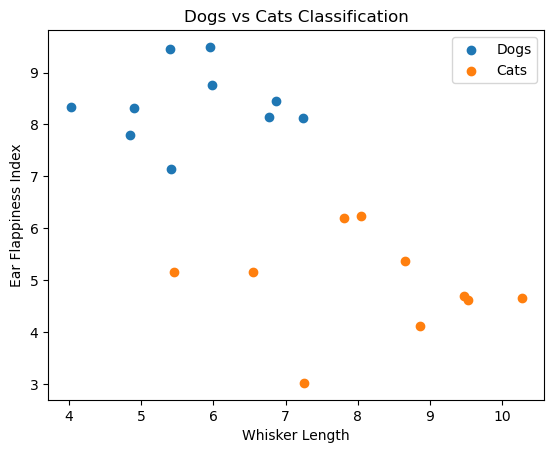

In [535]:
# Plot the data points for illustration purposes.
# Scatter plot: dogs data->blue, cats data->orange.
plt.scatter(dogs_whisker_length, dogs_ear_flipping_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flipping_index, label='Cats')  # Fixed variable name
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification')
plt.legend()  # for labels
plt.show()

In [536]:
data_dogs = np.vstack((dogs_whisker_length, dogs_ear_flapping_index)).T # T: transpose
print(data_dogs, "<- dog(x, y)")
data_cats = np.vstack((cats_whisker_length, cats_ear_flapping_index)).T
data = np.vstack((data_dogs, data_cats))
print(data)
labels = np.hstack((np.zeros(len(data_dogs)), np.ones(len(data_cats))))

[[6.76405235 7.78321813]
 [5.40015721 6.80766496]
 [5.97873798 8.7861623 ]
 [7.2408932  7.82351265]
 [6.86755799 8.53124418]
 [4.02272212 7.36621852]
 [5.95008842 8.50931182]
 [4.84864279 7.31600601]
 [4.89678115 8.57829697]
 [5.4105985  9.6045951 ]] <- dog(x, y)
[[ 6.76405235  7.78321813]
 [ 5.40015721  6.80766496]
 [ 5.97873798  8.7861623 ]
 [ 7.2408932   7.82351265]
 [ 6.86755799  8.53124418]
 [ 4.02272212  7.36621852]
 [ 5.95008842  8.50931182]
 [ 4.84864279  7.31600601]
 [ 4.89678115  8.57829697]
 [ 5.4105985   9.6045951 ]
 [ 5.44701018  5.02104861]
 [ 8.6536186   5.27303361]
 [ 8.8644362   5.93731937]
 [ 7.25783498  4.43415229]
 [10.26975462  2.0180803 ]
 [ 6.54563433  4.26870495]
 [ 8.04575852  4.36072608]
 [ 7.81281615  5.31302696]
 [ 9.53277921  6.38529114]
 [ 9.46935877  3.27744297]]


In [537]:
print(labels) # dogs data labelled as 0 and vice versa.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [538]:
# Best practice! Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [539]:
# Scale the features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [540]:
print("Test data:\n", X_test)
print("Train data:\n", X_train)

Test data:
 [[6.76405235 7.78321813]
 [7.81281615 5.31302696]
 [6.54563433 4.26870495]
 [5.40015721 6.80766496]]
Train data:
 [[ 4.89678115  8.57829697]
 [ 4.02272212  7.36621852]
 [ 8.6536186   5.27303361]
 [ 7.2408932   7.82351265]
 [ 9.53277921  6.38529114]
 [ 8.04575852  4.36072608]
 [ 7.25783498  4.43415229]
 [ 5.97873798  8.7861623 ]
 [ 5.4105985   9.6045951 ]
 [ 9.46935877  3.27744297]
 [ 6.86755799  8.53124418]
 [ 8.8644362   5.93731937]
 [ 4.84864279  7.31600601]
 [ 5.44701018  5.02104861]
 [10.26975462  2.0180803 ]
 [ 5.95008842  8.50931182]]


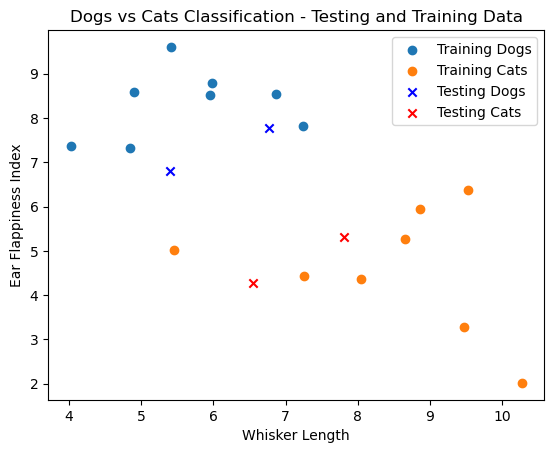

In [541]:
# Plot the data points for illustration purposes.
# Scatter plot: dogs data->blue, cats data->orange.
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Training Dogs')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Training Cats')


# Separate scatter plots for testing data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', marker='x', label='Testing Dogs')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', marker='x', label='Testing Cats')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification - Testing and Training Data')
plt.legend()  # for labels
plt.show()

## Second step: Generate hypothesis class
Hypothesis class: All the space of straight lines which are possible since we are building a linear classifier.



## Third step: Define the loss function 
Count the number of mistakes for each hypothesis and we are going to choose the hypothesis with the least error

In [542]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    # Two matrices product that is [theta_for_x, theta_for_y] @ [x_feature, y_feature]
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 > 0:  # Dogs should be classified as 0 (negative side)
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 <= 0:  # Cats should be classified as 1 (positive side)
            error += 1
    return error

# Fourth step: Finding the best hypothesis
#### Define an algorithm which finds the best hypothesis -> Random linear classifier algorithm( To find the best straight line)</br>
### Algo: Random Linear Classifier(To find the optimal values of all the parameters).</br>
- Step 1: Try K random choices of all the parameters..</br>
- Step 2: Compute training error for each of the K hypothesis..</br>
- Step 3: Choose the hypothesis with the least training error..</br>
### Training error: 
- hypothesis choosen -> sign(h(theta0, theta1, theta2)) for all the points..</br>
- if sign() > 0 -> +1(Dog), sign() < 0 -> -1(Cat)..</br>


In [543]:
def random_linear_classifier(data_dogs, data_cats, k, dim):  # dim: number of features
    best_error = float('inf')  # Initialize best error as infinity
    best_theta, best_theta0 = None, None  # Initialize best parameters

    for _ in range(k):
        theta = np.random.normal(size=dim)  # Randomly initialize theta
        # Since theta is initialized with np.random.normal(size=d), it will have dim elements(thetas).
        theta0 = np.random.normal()  # Randomly initialize theta0

        error = compute_error(data_dogs, data_cats, theta, theta0)  # Compute classification error

        if error < best_error:  # Update best parameters if lower error is found
            best_error, best_theta, best_theta0 = error, theta, theta0
           
    return best_theta, best_theta0, best_error


## Fifth step: Run the algorithm

In [544]:
def evaluate_multiple_k_folds(data, labels, k_values):
    """
    Evaluates the model using cross-validation for different k values.
    
    Args:
        data: Feature data
        labels: Target labels
        k_values: List of k values to try
        
    Returns:
        best_k: Best k value found
        lowest_error: Lowest error achieved
        errors: Dictionary of errors for each k value
    """
    np.random.seed(42)  # Consistent random state
    errors = {}
    best_k = None
    lowest_error = float('inf')  # Start with a very high error

    for k in k_values:
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Fixed 5-fold CV
        total_error = 0
        total_samples = 0

        for train_index, test_index in kf.split(data):
            X_train_fold, X_test_fold = data[train_index], data[test_index]
            y_train_fold, y_test_fold = labels[train_index], labels[test_index]

            # Scale the features
            scaler = StandardScaler()
            X_train_fold_scaled = scaler.fit_transform(X_train_fold)
            X_test_fold_scaled = scaler.transform(X_test_fold)

            # Train classifier with current k iterations
            best_theta, best_theta0, _ = random_linear_classifier(
                X_train_fold_scaled[y_train_fold == 0], 
                X_train_fold_scaled[y_train_fold == 1], 
                k, 
                dim=2
            )

            # Compute error for this fold
            fold_error = compute_error(
                X_test_fold_scaled[y_test_fold == 0], 
                X_test_fold_scaled[y_test_fold == 1], 
                best_theta, 
                best_theta0
            )
            
            # Normalize by number of test samples
            normalized_error = fold_error / len(test_index)
            total_error += normalized_error
            total_samples += 1

        avg_error = total_error / total_samples  # Average over folds
        errors[k] = avg_error  # Store error

        # Track the best k (smallest error)
        if avg_error < lowest_error:
            lowest_error = avg_error
            best_k = k

    return best_k, lowest_error, errors  # Return best k & its error

# Different k values for iteration count in random_linear_classifier
k_values = [10, 50, 100, 200, 500]
best_k, lowest_error, errors = evaluate_multiple_k_folds(data, labels, k_values)

# Print results
for k, error in errors.items():
    print(f"Average Cross-Validation Error for k={k}: {error}")

print(f"\n✅ Best k value: {best_k} with lowest cross-validation error: {lowest_error}")


Average Cross-Validation Error for k=10: 0.2
Average Cross-Validation Error for k=50: 0.1
Average Cross-Validation Error for k=100: 0.05
Average Cross-Validation Error for k=200: 0.0
Average Cross-Validation Error for k=500: 0.05

✅ Best k value: 200 with lowest cross-validation error: 0.0


In [545]:
# Convert y_train to a NumPy array (if it isn't already)
y_train = np.array(y_train)

# Run random linear classifier algorithm on training data
k = 100  # Number of iterations
dim = X_train.shape[1]  # Number of features

best_theta_train, best_theta0_train, train_error = random_linear_classifier(
    X_train[y_train == 0],  # Dogs data
    X_train[y_train == 1],  # Cats data
    k,
    dim
)


In [546]:
# Check if theta is valid
if best_theta_train is None or best_theta_train[1] == 0:
    raise ValueError("Invalid theta values. Ensure best_theta_train is properly computed.")

# Generate x values for plotting decision boundary
x_vals_train = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)

# Compute corresponding y values while avoiding division by zero
y_vals_train = - (best_theta_train[0] / (best_theta_train[1] + 1e-8)) * x_vals_train - (best_theta0_train / (best_theta_train[1] + 1e-8))


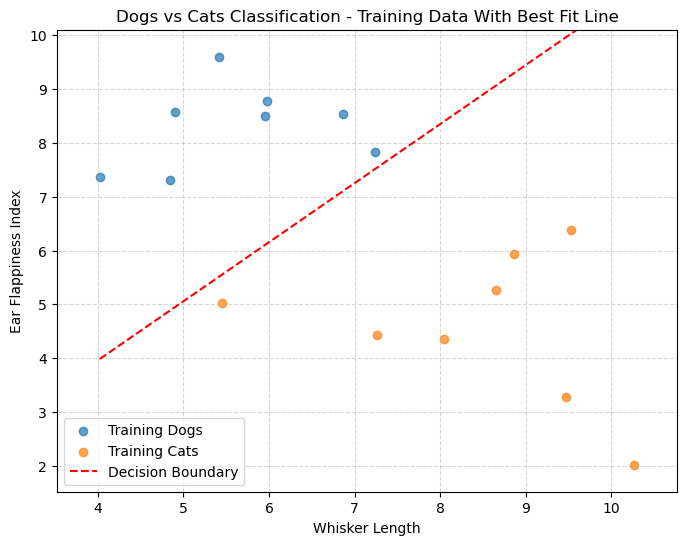

In [547]:
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Training Dogs', alpha=0.7)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Training Cats', alpha=0.7)

# Plot decision boundary
plt.plot(x_vals_train, y_vals_train, linestyle='--', color='red', label='Decision Boundary')

# Adjust limits with padding for better visualization
plt.xlim(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5)
plt.ylim(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5)

# Labels, title, and grid
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification - Training Data With Best Fit Line')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability
plt.show()


## Sixth step: Validating the results
#### Measure the test error

**Note:** It is a good practice to divide the dataset into training and testing sets to evaluate whether our algorithm performs well on unseen test data 

In [548]:
print(f"Training Error:{train_error}")

Training Error:0


In [549]:
# Separate test data based on labels
X_test_dogs = X_test[y_test == 0]  # Select only dog data points
X_test_cats = X_test[y_test == 1]  # Select only cat data points

# Compute testing error correctly
test_error = compute_error(X_test[y_test == 0], X_test[y_test == 1], best_theta_train, best_theta0_train)
print(f"Testing Error: {test_error}")


Testing Error: 0


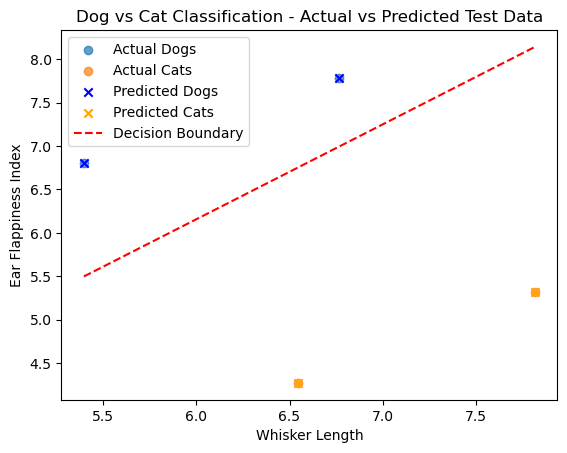

In [550]:
# Compute decision boundary for test data
x_vals_test = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_vals_test = (-best_theta_train[0] / best_theta_train[1]) * x_vals_test - (best_theta0_train / best_theta_train[1])

# Plot actual test data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Actual Dogs', alpha=0.7)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Actual Cats', alpha=0.7)

# Predict test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x in enumerate(X_test):
    if np.dot(best_theta_train, x) + best_theta0_train > 0:
        predicted_labels[i] = 1

# Plot predicted test data points
plt.scatter(X_test[predicted_labels == 0][:, 0], X_test[predicted_labels == 0][:, 1], marker='x', label='Predicted Dogs', color='blue')
plt.scatter(X_test[predicted_labels == 1][:, 0], X_test[predicted_labels == 1][:, 1], marker='x', label='Predicted Cats', color='orange')

# Plot decision boundary
plt.plot(x_vals_test, y_vals_test, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend()
plt.show()


## Comparing with scikit-learn implementations

In [551]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Calculate normalized test error (if not already calculated)
# test_error should be defined from previous cell
test_error_normalized = test_error / len(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

# Train a linear SVM
svm = LinearSVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print comparison results
our_accuracy = 1 - test_error_normalized
print(f"Our Random Linear Classifier Accuracy: {our_accuracy:.2%}")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2%}")
print(f"Linear SVM Accuracy: {svm_accuracy:.2%}")

Our Random Linear Classifier Accuracy: 100.00%
Logistic Regression Accuracy: 100.00%
Linear SVM Accuracy: 100.00%
